# Data Exploration

We are using the Sign Language MNIST datasets from Kaggle.

But first, we are importing all the libraries needed.

In [112]:
import numpy as np 
import pandas as pd 
        
import matplotlib.pyplot as plt 
import seaborn as sns 


The datasets that we found from kaggle were separated into training and testing csv files. We've uploaded those zip files to the Gihub repo. Here we are unzipping those files.

In [104]:
# getting the train and test data sets from github repo
url_train = "https://github.com/hirenpateldotdev/ecs171_final_project/raw/main/sign_mnist_train.csv.zip"
!wget -O data_train.zip "$url_train"
!unzip data_train.zip

url_test = "https://github.com/hirenpateldotdev/ecs171_final_project/raw/main/sign_mnist_test.csv.zip"
!wget -O data_test.zip "$url_test"
!unzip data_test.zip



--2022-11-21 06:01:51--  https://github.com/hirenpateldotdev/ecs171_final_project/raw/main/sign_mnist_train.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hirenpateldotdev/ecs171_final_project/main/sign_mnist_train.csv.zip [following]
--2022-11-21 06:01:52--  https://raw.githubusercontent.com/hirenpateldotdev/ecs171_final_project/main/sign_mnist_train.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25759917 (25M) [application/zip]
Saving to: ‘data_train.zip’

data_train.zip      100%[===================>]  24.57M   139MB/s    in 0.2s    

2022-11-21 06:01:54 (139 MB/s) - ‘data

Next we read the files. The size of the training and testing data are 27455 and 7172 respectively, each with one column named "label" indicating the alphabet the row referes to and 784 pixels, for an image of 28 X 28 pixels.

We want to merge the training and testing data into one file so in later steps we can apply cross validation to ensure the model is learning and predicting values as best as possible.

In [105]:
df_train = pd.read_csv("./sign_mnist_train.csv")
df_test = pd.read_csv("./sign_mnist_test.csv")
display(df_train.shape, df_train.head())
display(df_test.shape, df_test.head())



(27455, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


(7172, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Here we combine both the files into one and plot a histogram showing that the dataset has equal number of training values for each of the 24 letters. As a reminder, 2 of the 26 alphabets in the Sign Language MNIST require movement of the hand, so we are classifying the rest of the 24 alphabets. (The two alphabets are label 9 = J and label 25 = Z, which you dont see the histogram plot below.)

The total number of images are 34627, the summation of the number of training and testing datasets.


(34627, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,...,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.00000
mean,12.096890,145.857077,148.903226,151.677824,153.984983,156.616600,158.904121,160.847171,162.610911,164.293384,...,140.574985,147.090479,152.791261,158.403211,161.332140,162.097063,161.923528,161.077136,160.211309,158.77919
std,7.333559,41.839313,40.355637,39.355866,38.762706,37.252215,36.130753,35.274594,34.137995,32.882325,...,63.914830,65.438124,64.713282,64.112086,64.055046,63.886450,64.166570,63.892399,64.395504,65.25230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,5.000000,122.000000,126.000000,130.000000,133.000000,137.000000,140.000000,143.000000,145.000000,146.000000,...,91.500000,96.000000,102.000000,110.000000,118.000000,122.000000,124.000000,124.000000,124.000000,121.00000
50%,12.000000,151.000000,154.000000,156.000000,158.000000,160.000000,163.000000,164.000000,166.000000,167.000000,...,142.000000,161.000000,172.000000,179.000000,183.000000,183.000000,183.000000,182.000000,182.000000,181.00000
75%,18.000000,175.000000,177.000000,179.000000,180.000000,181.000000,182.000000,184.000000,185.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,205.000000,204.00000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


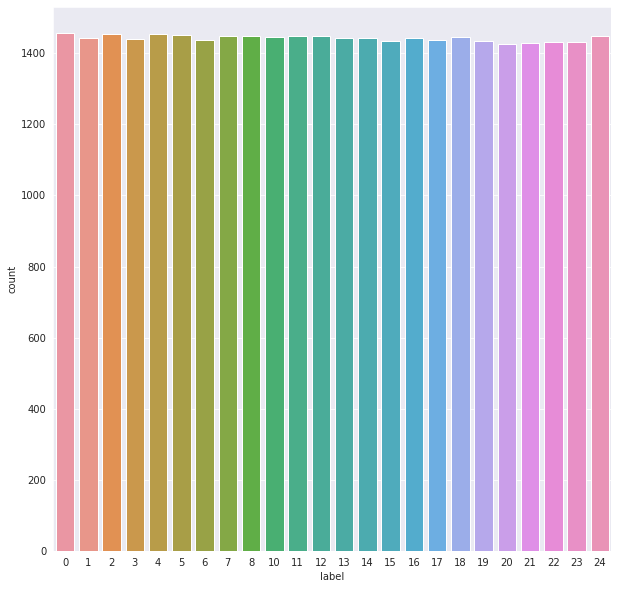

In [106]:
df = pd.concat([df_train,df_test])
display(df.shape)
display(df.describe())


plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(df['label'])

# Data Description

The number of classes = 24, ie the label (alphabet) values.

In [107]:
labels = df.label.unique()
labels

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [108]:
#getting all the letters
letter = df.drop_duplicates(subset = ["label"])

letter = letter.drop(columns = ["label"])
print(letter.shape)



(24, 784)


The dataset has already been cropped, grayscale and normalized.
We have 24 classes for the 24 alphabets, each image is 28x28, a total of 784 pixels.

Here we are displaying our example classes before preprocessing. 


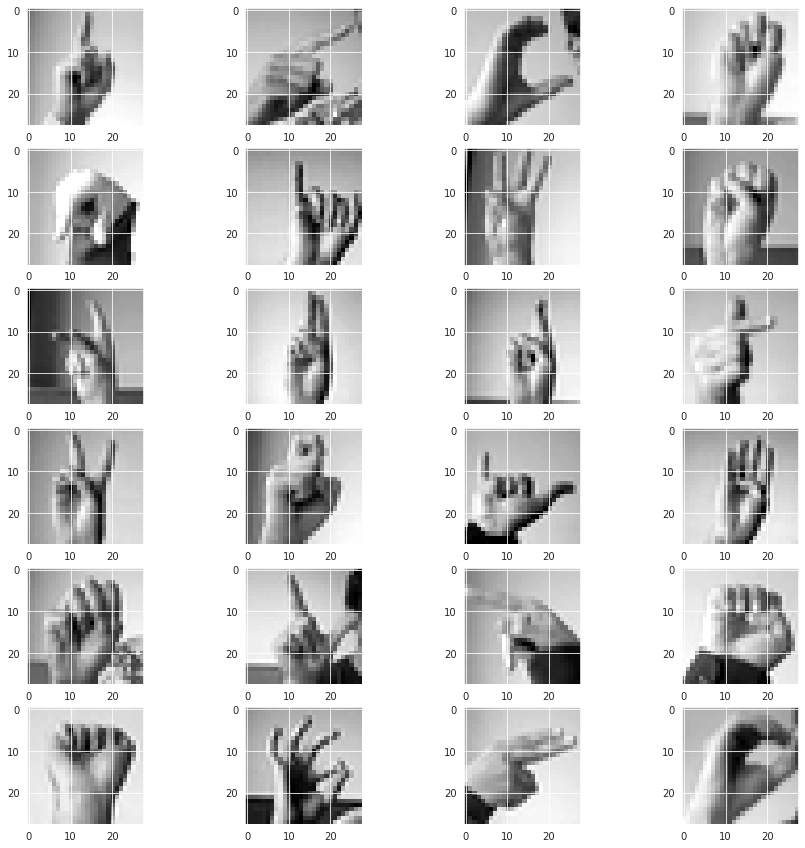

In [109]:
k = 0
figure, axis = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)
for rows in range(6):
  for columns in range(4):
    img = letter.iloc[k].values.reshape(28,28)
    axis[rows][columns].imshow(img,cmap = "gray")
    k +=1

Here we standardize our data using preprocessing from sklearn.

(24, 784)
(24, 784)


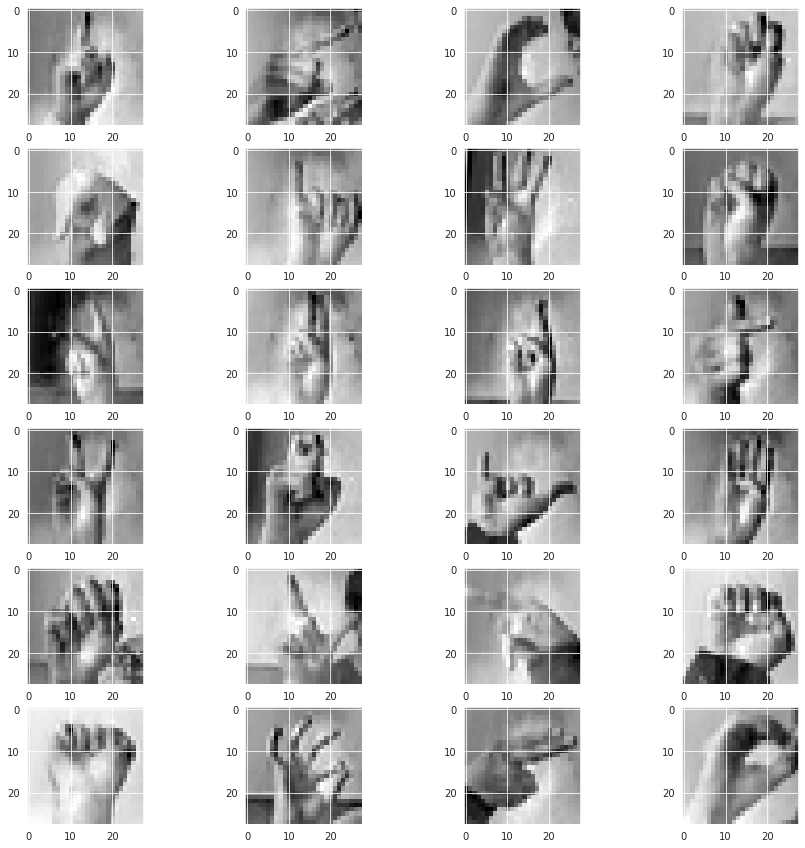

In [110]:
from sklearn import preprocessing

#getting all the letters
# letter = df.drop_duplicates(subset = ["label"])

# print(letter.shape)
# print(letter)
# letter = letter.drop(columns = ["label"])

print(letter.shape)
letter = preprocessing.scale(letter)
print(letter.shape)
k = 0
figure, axis = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)
for rows in range(6):
  for columns in range(4):
    img = letter[k].reshape(28,28)
    axis[rows][columns].imshow(img,cmap = "gray")
    k +=1


# k = 0
# figure, axis = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)
# for rows in range(6):
#   for columns in range(4):
#     img = letter.iloc[k].values.reshape(28,28)
#     axis[rows][columns].imshow(img,cmap = "gray")
#     k +=1
    


# Heat Map

Additionally, we wanted to see if we can use a heatmap on these handsigns to compare darker and lighter spots in the image and if it is possible to identify the handsigns from it.

We make a heatmap where we overlap all of the images of a particular label on each other and corelate each of the pixels to show the darker and lighter values in each hand sign.

0  =  3  images
1  =  8  images
2  =  5  images
3  =  4  images
4  =  2  images
5  =  4  images
6  =  3  images
7  =  2  images
8  =  0  images
9  =  5  images
10  =  4  images
11  =  3  images
12  =  5  images
13  =  5  images
14  =  4  images
15  =  10  images
16  =  2  images
17  =  7  images
18  =  4  images
19  =  2  images
20  =  5  images
21  =  3  images
22  =  4  images
23  =  6  images


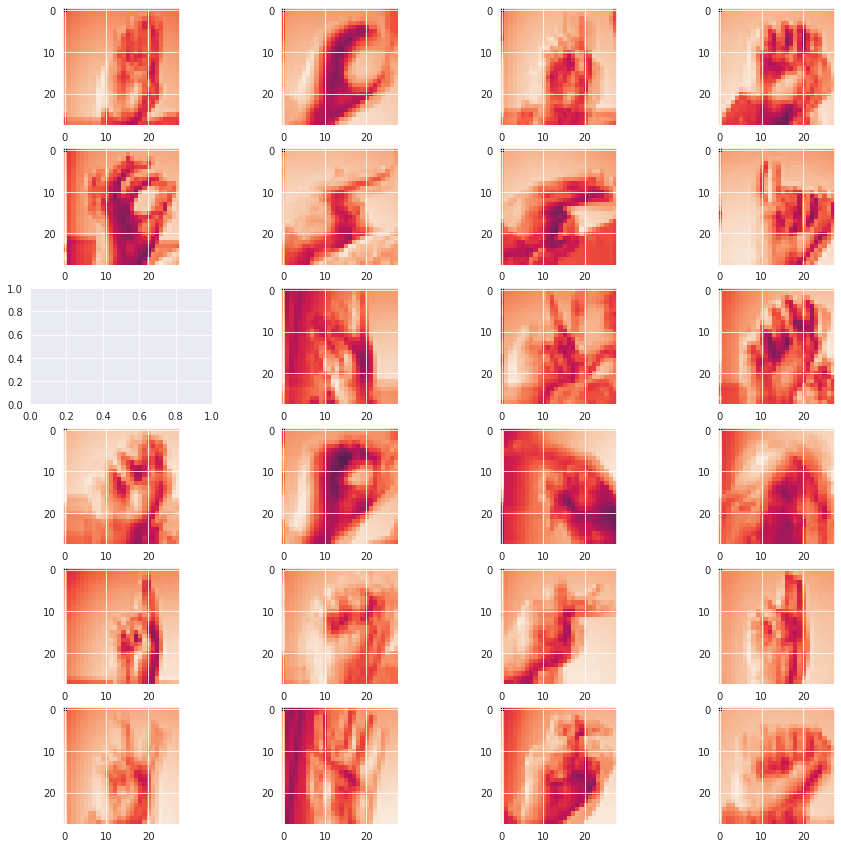

In [111]:
# y = df['label']
# # del df['label']

# # from sklearn. preprocessing import LabelBinarizer
# # label_binarizer = LabelBinarizer ()
# # y= label_binarizer.fit_transform(y)
# x = df.values
# x = x / 255
# x = x.reshape(-1,28,28,1)

y = df['label']
x = df.values

sizeOfImg = 784
totalLetters = 24
heatmaps = [[0 for pixel in range(sizeOfImg)] for letter in range(totalLetters)] #[[0]*sizeOfImg]*totalLetters

lableCount = [0]* totalLetters


for k in range(100):
#     print (len (df.loc[[k]]))
    row = (df.loc[[k]].values.flatten().tolist())
#     print (len(row))
#     print (row)
    label = row[0] - 1
#     print (label)
    lableCount[label] += 1
    # print("first row:")
    # print(heatmaps[0])
    # print("first row:")
    # print("|")
    for i in range(1,sizeOfImg):
#         print(row[i])
#         if row[i] > 127:    
        heatmaps[label][i] = heatmaps[label][i] + row[i]
    # print(label, heatmaps[label])

for k in range(len(lableCount)):
    print(k, " = " ,lableCount[k], " images")
    if (lableCount[k] != 0):
        label = k
        for i in range(sizeOfImg):
            heatmaps[k][i] = heatmaps[k][i] / lableCount[label]



figureHM, axisHM = plt.subplots(nrows=6, ncols=4, figsize=(15,15),)

import cv2

k = 0
for rowsHM in range(6):
    for columnsHM in range(4):
        if (lableCount[k] != 0):
            imgHM = np.reshape(heatmaps[k], (28,28))
#             HM = cv2.applyColorMap(imgHM.astype(np.uint8),cv2.COLORMAP_HOT)
#             print(k , imgHM)
            axisHM[rowsHM][columnsHM].imshow(imgHM)
        k+=1


# k = 0
# for rowsHM in range(6):
#   for columnsHM in range(4):
#     if (k <= totalLetters):
#       if (lableCount[k] == 0):
#         k+=1
#     else:
#       imgHM = np.reshape(heatmaps[k], (28,28))
#       axisHM[rowsHM][columnsHM].imshow(imgHM)
#     k+=1